### 데이터 특성 파악

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/대구은행/자유주제_피부_프로젝트/메타데이터/Skin_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_no       1072 non-null   int64  
 1   수분_이마            1072 non-null   float64
 2   수분_오른쪽볼          1072 non-null   float64
 3   수분_왼쪽볼           1072 non-null   float64
 4   수분_턱             1072 non-null   float64
 5   탄력_턱_R0          1072 non-null   float64
 6   탄력_턱_R1          1072 non-null   float64
 7   탄력_턱_R2          1072 non-null   float64
 8   탄력_턱_R3          1072 non-null   float64
 9   탄력_턱_R4          1072 non-null   float64
 10  탄력_턱_R5          1072 non-null   float64
 11  탄력_턱_R6          1072 non-null   float64
 12  탄력_턱_R7          1072 non-null   float64
 13  탄력_턱_R8          1072 non-null   float64
 14  탄력_턱_R9          1072 non-null   float64
 15  탄력_턱_Q0          1072 non-null   float64
 16  탄력_턱_Q1          1072 non-null   float64
 17  탄력_턱_Q2       

In [ ]:
# 2023-07-27 ~ 10-17까지 데이터 수집

df['측정날짜'].value_counts().sort_index()

,count
측정날짜,
2023-07-27,24
2023-07-28,25
2023-07-31,25
2023-08-01,24
2023-08-02,13
2023-08-17,25
2023-08-18,25
2023-08-21,24
2023-08-22,25


In [ ]:
# Y로 사용
df['얼굴피부타입'].value_counts()

,count
얼굴피부타입,
건성,303
중성,260
지성,187
복합지성,161
복합건성,157
심한건성,4


##### 연령대 파생변수

In [ ]:
df['나이'].unique()

array([55, 50, 24, 47, 52, 40, 53, 59, 46, 43, 48, 42, 49, 56, 44, 45, 51,
       39, 54, 38, 31, 41, 26, 25, 22, 37, 20, 19, 29, 14, 27, 32, 23, 13,
       36, 17, 15, 21, 35, 63, 18, 16, 33, 28, 60, 30, 57, 64, 67, 66, 61,
       62, 58, 68, 65, 69, 34])

In [ ]:

# 나이에 따라 연령대를 분류하는 함수
def categorize_age(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    else:
        return '60대 이상'

# 새로운 파생변수 '연령대' 생성
df['연령대'] = df['나이'].apply(categorize_age)

In [ ]:
df.head()

,subject_no,수분_이마,수분_오른쪽볼,수분_왼쪽볼,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,...,주름_오른쪽눈가_Rv,스팟개수_정면,모공개수_오른쪽볼,모공개수_왼쪽볼,성별,나이,얼굴피부타입,자가민감여부,측정날짜,연령대
0,1,53.00,76.33,71.67,78.67,0.204,0.083,0.5931,0.243,0.123,...,52.115,147,608,629,여성,55,복합건성,아니오,2023-07-27,50대
1,2,75.00,64.00,63.00,66.00,0.279,0.088,0.6846,0.322,0.152,...,68.907,158,691,631,여성,50,중성,아니오,2023-07-27,50대
2,3,55.67,59.00,58.00,57.67,0.375,0.143,0.6187,0.399,0.182,...,55.790,32,417,312,여성,24,중성,아니오,2023-07-27,20대
3,4,58.00,53.33,53.67,63.33,0.249,0.093,0.6265,0.285,0.149,...,64.950,291,924,897,여성,47,복합지성,예,2023-07-27,40대
4,6,63.67,64.00,60.67,70.33,0.199,0.097,0.5126,0.248,0.158,...,57.030,90,301,382,여성,55,복합건성,아니오,2023-07-27,50대


In [ ]:
# 데이터프레임을 CSV 파일로 저장
df.to_csv('Skin_data2.csv', index=False, encoding='utf-8-sig')


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123599 files and direc

In [ ]:
df['얼굴피부타입'] = df['얼굴피부타입'].replace({
    '복합지성': '복합성',
    '복합건성': '복합성',
    '심한건성': '건성'
})

print(df['얼굴피부타입'].value_counts())

얼굴피부타입
복합성    318
건성     307
중성     260
지성     187
Name: count, dtype: int64


In [ ]:
# DataFrame을 CSV 파일로 저장
df.to_csv('Skin_data3.csv', index=False, encoding='utf-8-sig')


#### EDA

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_csv('/content/drive/MyDrive/대구은행/자유주제_피부_프로젝트/메타데이터/Skin_data3.csv')
df['얼굴피부타입'].value_counts()

,count
얼굴피부타입,
복합성,318
건성,307
중성,260
지성,187


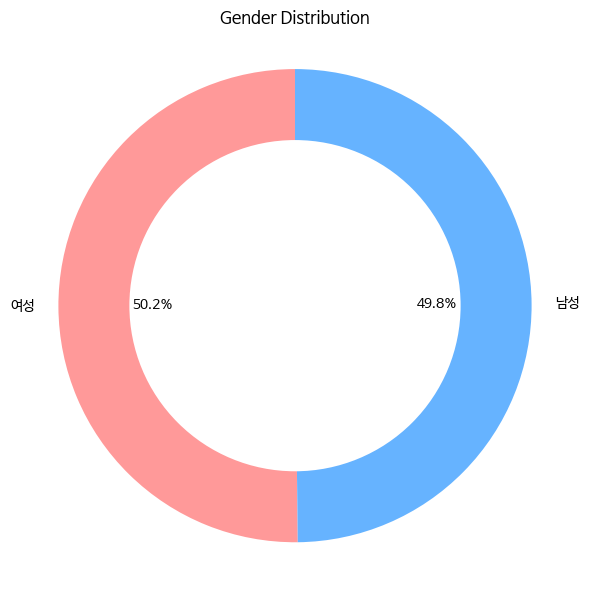

In [ ]:
import matplotlib.pyplot as plt

# 성별별 데이터 개수
gender_counts = df['성별'].value_counts()

# 도넛 차트 생성
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
# 가운데 원 그려서 도넛 모양 만들기
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# 차트 제목
plt.title('Gender Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()


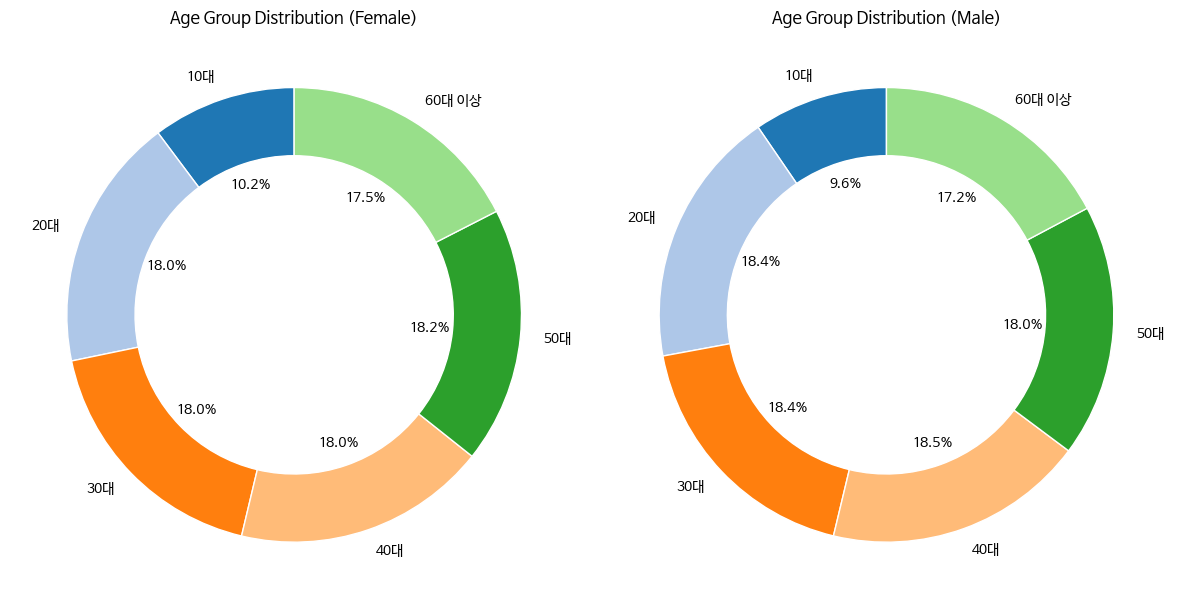

In [ ]:
import matplotlib.pyplot as plt

# 성별별 연령대 개수 계산
gender_age_group_counts = df.groupby(['성별', '연령대']).size().unstack()

# 색상 설정
colors = plt.get_cmap('tab20').colors

# 1. 여성 연령대 도넛 차트
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(aspect="equal"))

# 여성 데이터
female_counts = gender_age_group_counts.loc['여성']
ax[0].pie(female_counts, labels=female_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
# 가운데 원 추가 (도넛 모양)
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
ax[0].add_artist(centre_circle)

# 2. 남성 연령대 도넛 차트
male_counts = gender_age_group_counts.loc['남성']
ax[1].pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
# 가운데 원 추가 (도넛 모양)
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
ax[1].add_artist(centre_circle)

# 차트 제목 추가
ax[0].set_title('Age Group Distribution (Female)')
ax[1].set_title('Age Group Distribution (Male)')

# 차트 간격 조정
plt.tight_layout()
plt.show()


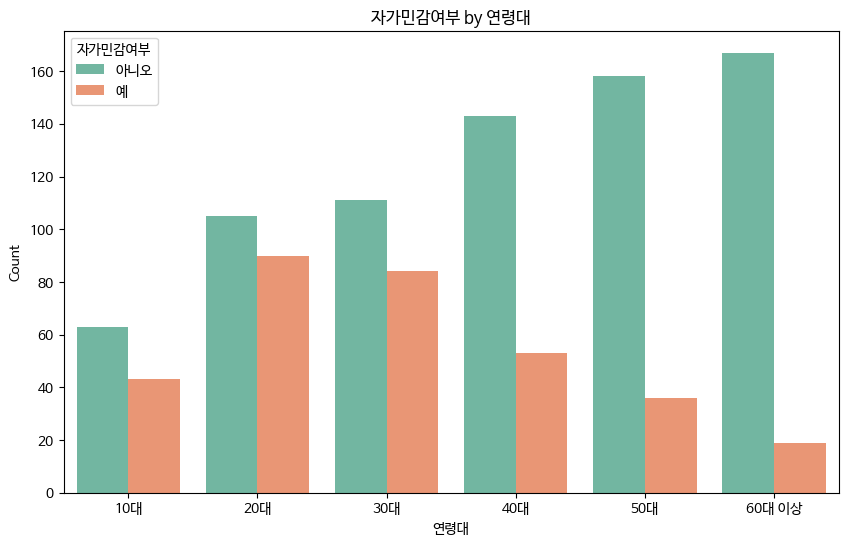

In [ ]:
import seaborn as sns

# 연령대별 자가민감여부 데이터 개수
age_group_sensitive_counts = df.groupby(['연령대', '자가민감여부']).size().reset_index(name='count')

# 막대 차트 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='count', hue='자가민감여부', data=age_group_sensitive_counts, palette='Set2')

# 차트 제목 및 레이블 설정
plt.title('자가민감여부 by 연령대')
plt.xlabel('연령대')
plt.ylabel('Count')
plt.legend(title='자가민감여부')
plt.show()


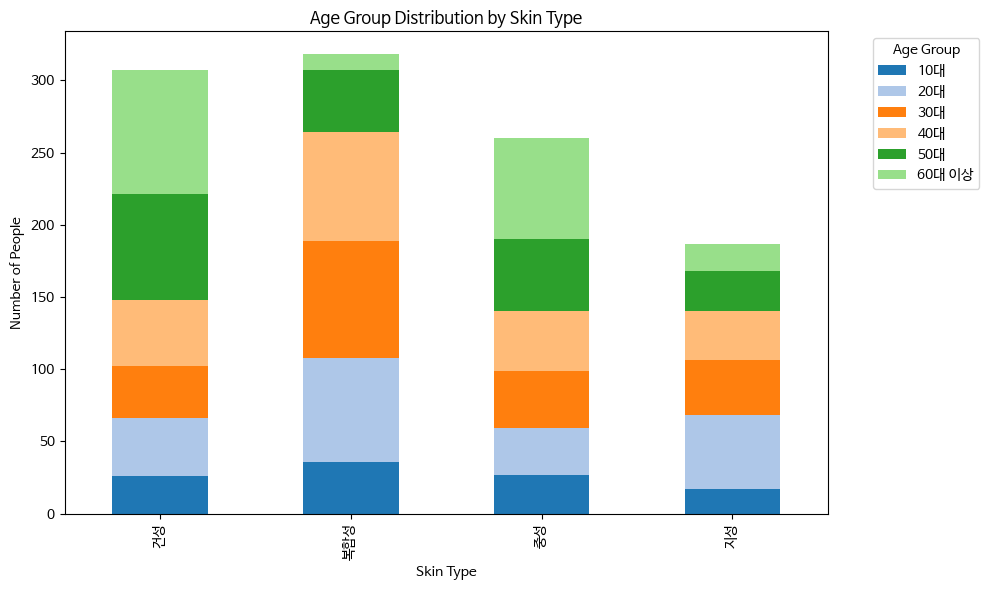

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 얼굴피부타입별 연령대 개수 계산
skin_type_age_group_counts = df.groupby(['얼굴피부타입', '연령대']).size().unstack()

# 색상 설정
colors = plt.get_cmap('tab20').colors

# 막대형 차트 그리기
skin_type_age_group_counts.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# 차트 제목과 축 레이블 설정
plt.title('Age Group Distribution by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Number of People')

# 범례 및 레이아웃 조정
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 차트 보여주기
plt.show()


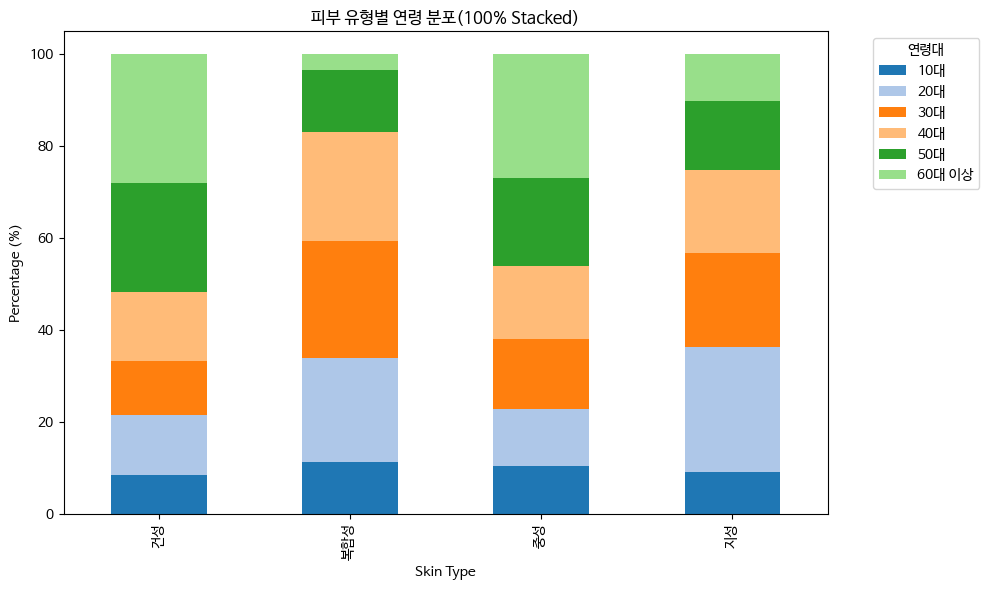

In [ ]:
# 연령대별 피부타입 분포가 매우 다양하기에
# 초개인화 맞춤 측정 필요

import matplotlib.pyplot as plt
import pandas as pd

# 얼굴피부타입별 연령대 개수 계산
skin_type_age_group_counts = df.groupby(['얼굴피부타입', '연령대']).size().unstack()

# 각 피부타입별 연령대 비율 계산 (100% 기준)
skin_type_age_group_percentage = skin_type_age_group_counts.div(skin_type_age_group_counts.sum(axis=1), axis=0) * 100

# 색상 설정
colors = plt.get_cmap('tab20').colors

# 100% 스택 막대형 차트 그리기
skin_type_age_group_percentage.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# 차트 제목과 축 레이블 설정
plt.title('피부 유형별 연령 분포(100% Stacked)')
plt.xlabel('Skin Type')
plt.ylabel('Percentage (%)')

# 범례 및 레이아웃 조정
plt.legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 차트 보여주기
plt.show()


In [ ]:
import pandas as pd
import scipy.stats as stats

# 교차표(피벗 테이블) 생성: 얼굴 피부 타입과 연령대 분포
contingency_table = pd.crosstab(df['얼굴피부타입'], df['연령대'])

# 카이제곱 검정 실행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# 유의수준 설정
alpha = 0.05
if p < alpha:
    print("p-value가 유의수준보다 작습니다. 얼굴 피부 타입과 연령대 간에는 유의미한 연관성이 있습니다.")
else:
    print("p-value가 유의수준보다 큽니다. 얼굴 피부 타입과 연령대 간에는 유의미한 연관성이 없습니다.")


Chi-square statistic: 133.51731656702228
p-value: 4.344982866471802e-21
Degrees of freedom: 15
Expected frequencies:
[[30.35634328 55.84421642 55.84421642 56.13059701 55.55783582 53.26679104]
 [31.44402985 57.84514925 57.84514925 58.14179104 57.54850746 55.17537313]
 [25.70895522 47.29477612 47.29477612 47.53731343 47.05223881 45.1119403 ]
 [18.49067164 34.01585821 34.01585821 34.19029851 33.84141791 32.44589552]]
p-value가 유의수준보다 작습니다. 얼굴 피부 타입과 연령대 간에는 유의미한 연관성이 있습니다.


In [ ]:
df['연령대'].value_counts()

,count
연령대,
40대,196
20대,195
30대,195
50대,194
60대 이상,186
10대,106


In [ ]:
# 수분_이마,오른쪽볼,왼쪽볼,턱 0~100 얼굴피부타입 분포 확인,연령대별
# 스팟개수 - 연령대별, 얼굴피부타입별

# 탄력 ,주름 미정

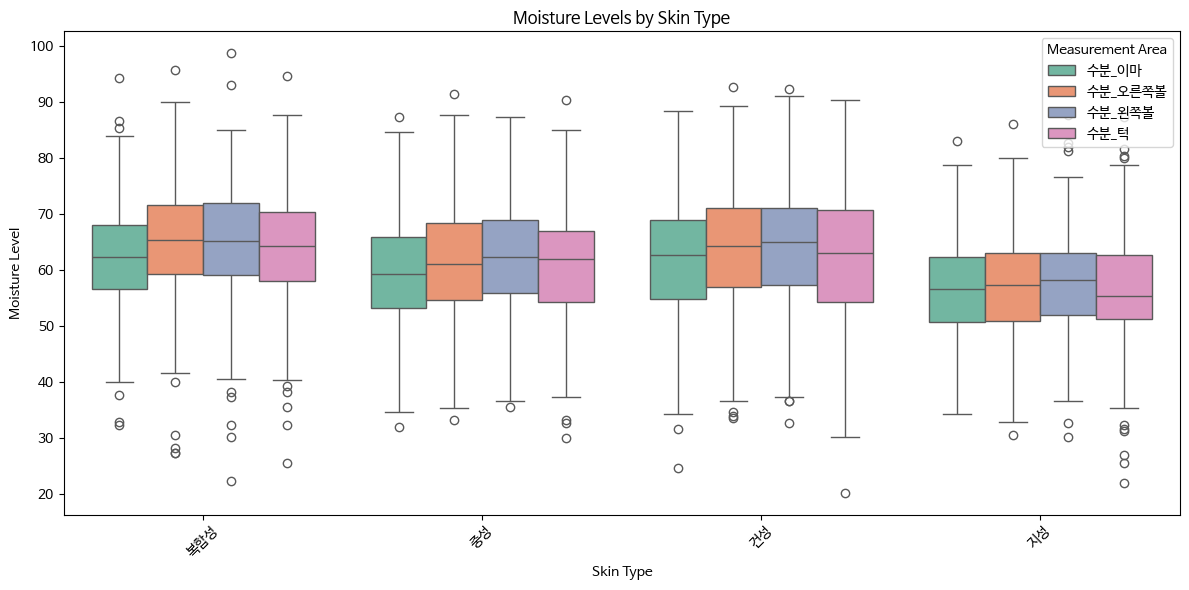

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 생성 (예시)
# df = pd.read_csv('your_data.csv')  # 데이터 로드

# 수분 데이터와 얼굴 피부 타입 선택
melted_df = df.melt(id_vars=['얼굴피부타입'], value_vars=['수분_이마', '수분_오른쪽볼', '수분_왼쪽볼', '수분_턱'],
                     var_name='부위', value_name='수분')

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='얼굴피부타입', y='수분', hue='부위', palette='Set2')

# 제목 및 레이블 설정
plt.title('Moisture Levels by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Moisture Level')
plt.legend(title='Measurement Area')
plt.xticks(rotation=45)
plt.tight_layout()

# 차트 보여주기
plt.show()


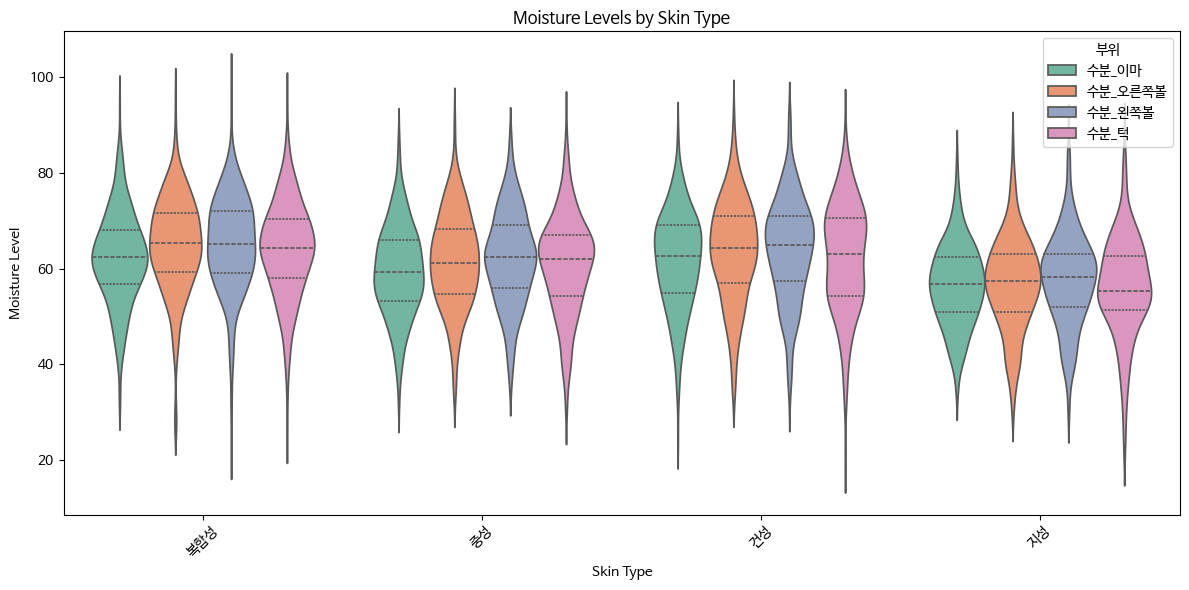

In [ ]:
# 수분 데이터와 얼굴 피부 타입 선택
melted_df = df.melt(id_vars=['얼굴피부타입'], value_vars=['수분_이마', '수분_오른쪽볼', '수분_왼쪽볼', '수분_턱'],
                     var_name='부위', value_name='수분')

# 바이올렛 플롯 그리기
plt.figure(figsize=(12, 6))
sns.violinplot(data=melted_df, x='얼굴피부타입', y='수분', hue='부위', palette='Set2', inner="quartile")

# 제목 및 레이블 설정
plt.title('Moisture Levels by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Moisture Level')
plt.xticks(rotation=45)
plt.tight_layout()

# 차트 보여주기
plt.show()

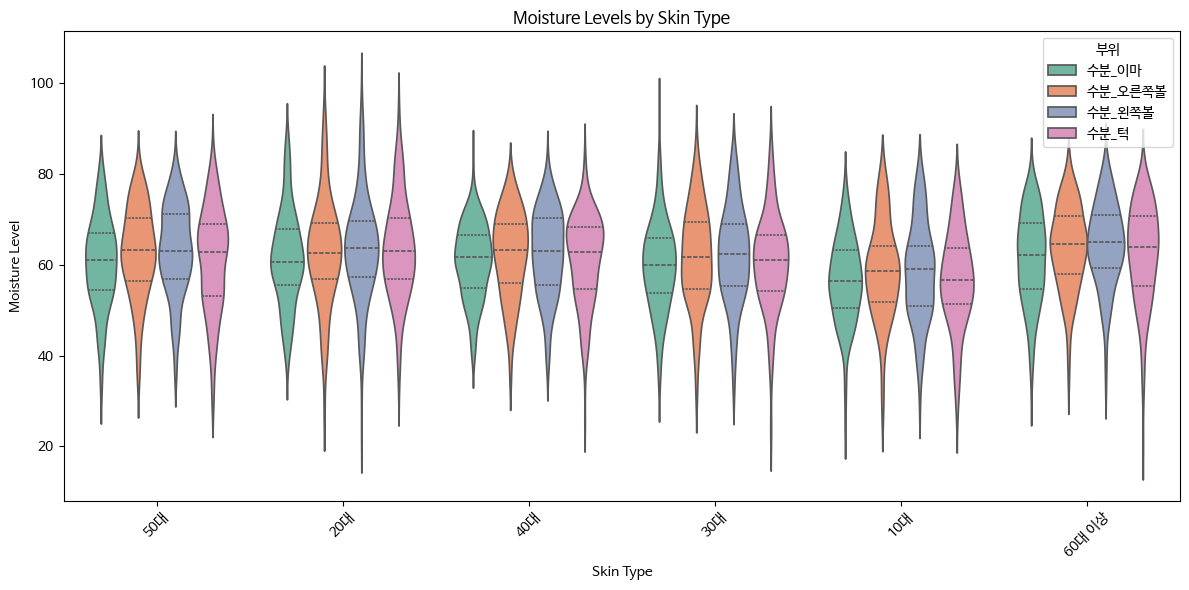

In [ ]:
# 수분 데이터와 얼굴 피부 타입 선택
melted_df = df.melt(id_vars=['연령대'], value_vars=['수분_이마', '수분_오른쪽볼', '수분_왼쪽볼', '수분_턱'],
                     var_name='부위', value_name='수분')

# 바이올렛 플롯 그리기
plt.figure(figsize=(12, 6))
sns.violinplot(data=melted_df, x='연령대', y='수분', hue='부위', palette='Set2', inner="quartile")

# 제목 및 레이블 설정
plt.title('Moisture Levels by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Moisture Level')
plt.xticks(rotation=45)
plt.tight_layout()

# 차트 보여주기
plt.show()

In [ ]:
# 스팟개수 - 연령대별, 얼굴피부타입별

<ipython-input-41-b7a43ff66eab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='연령대', y='스팟개수_정면', palette='Set2')


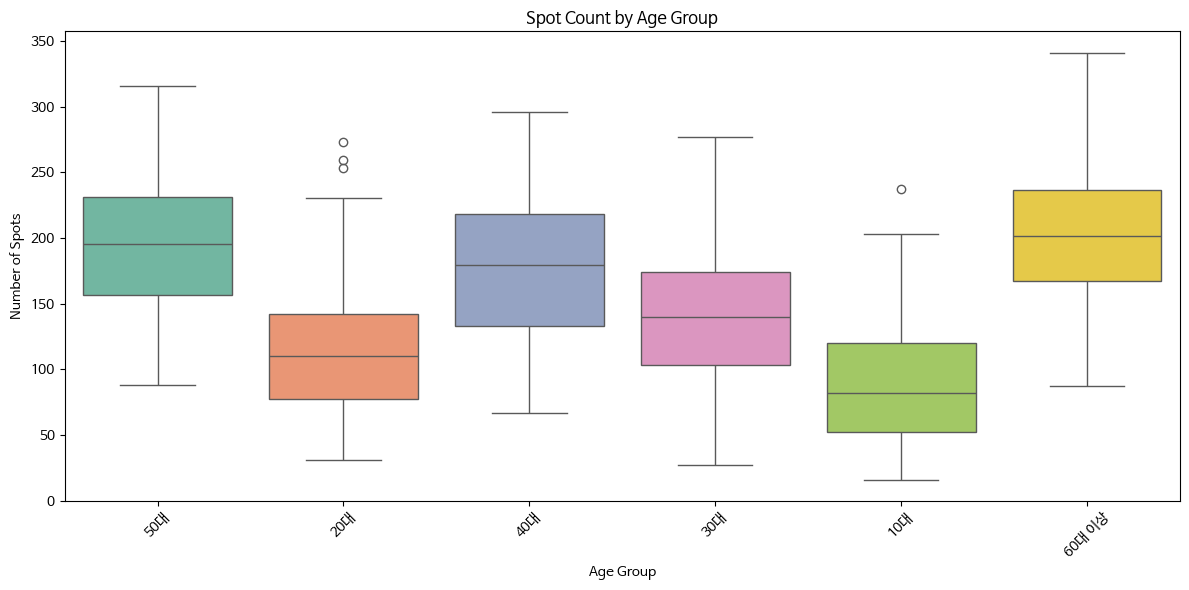

In [ ]:
# 연령대별 스팟 개수

# 상자 그림 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='연령대', y='스팟개수_정면', palette='Set2')

# 제목 및 레이블 설정
plt.title('Spot Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Spots')
plt.xticks(rotation=45)
plt.tight_layout()

# 차트 보여주기
plt.show()


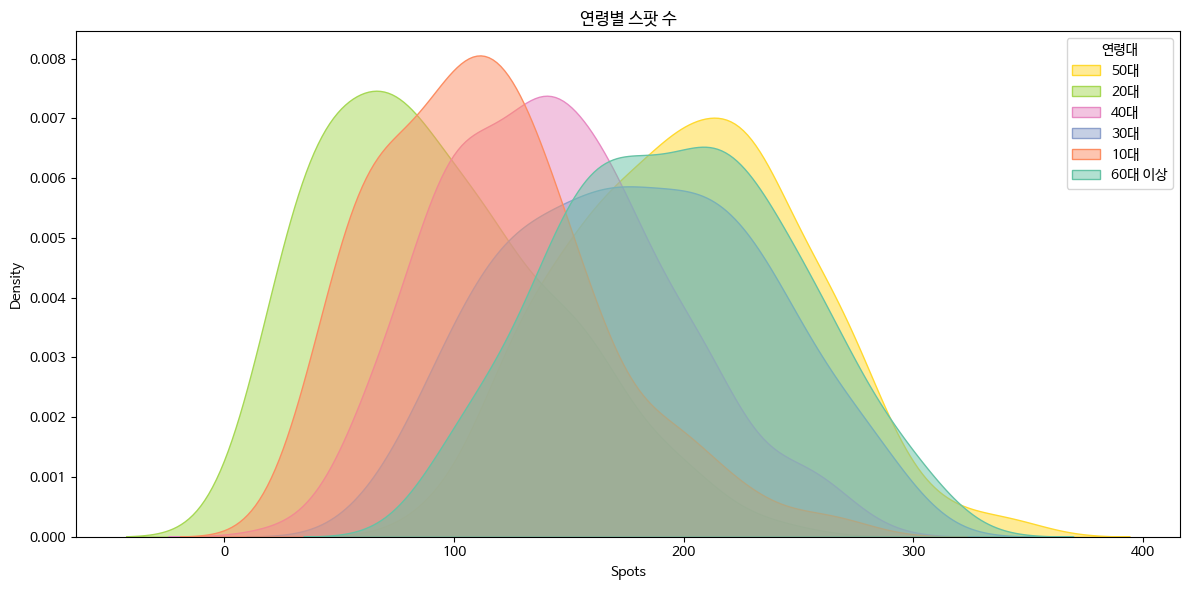

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연령대별 스팟 개수 분포 시각화
plt.figure(figsize=(12, 6))

# KDE 플롯 그리기
sns.kdeplot(data=df, x='스팟개수_정면', hue='연령대', fill=True, common_norm=False, palette='Set2', alpha=0.5, legend=False)

# 제목 및 레이블 설정
plt.title('연령별 스팟 수')
plt.xlabel('Spots')
plt.ylabel('Density')

# 범례 수동 추가
plt.legend(title='연령대', labels=df['연령대'].unique())
plt.tight_layout()

# 차트 보여주기
plt.show()


<ipython-input-30-3546dabc84a0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='연령대', y='스팟개수_정면', palette='Set2', inner='quartile')


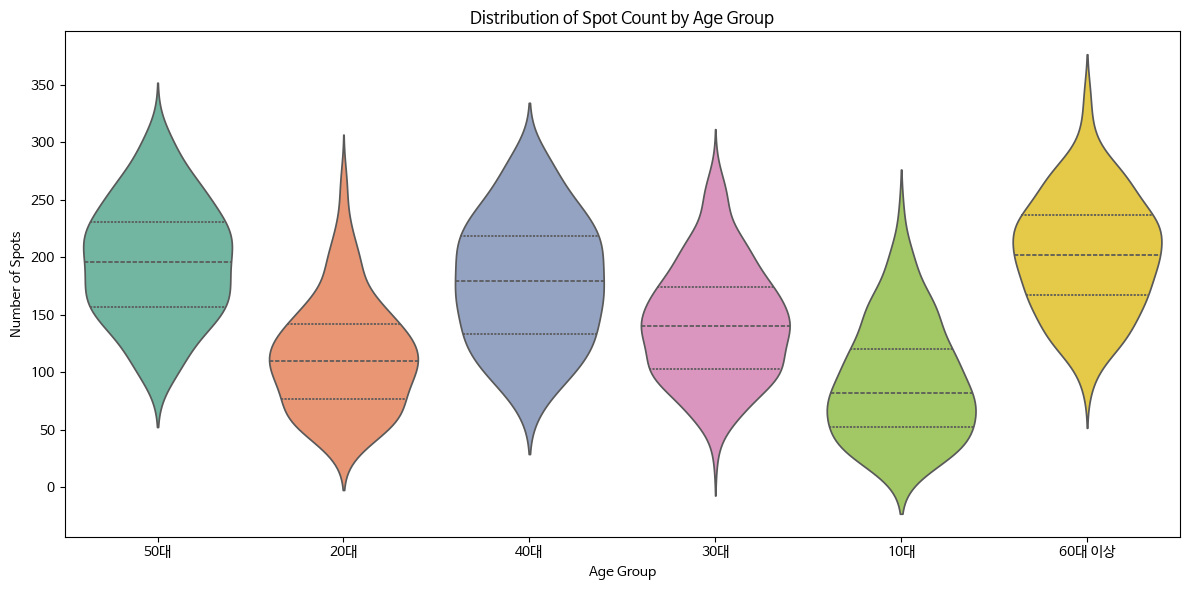

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연령대별 스팟 개수 분포 시각화
plt.figure(figsize=(12, 6))

# 바이올렛 플롯 그리기
sns.violinplot(data=df, x='연령대', y='스팟개수_정면', palette='Set2', inner='quartile')

# 제목 및 레이블 설정
plt.title('Distribution of Spot Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Spots')

# 차트 보여주기
plt.tight_layout()
plt.show()


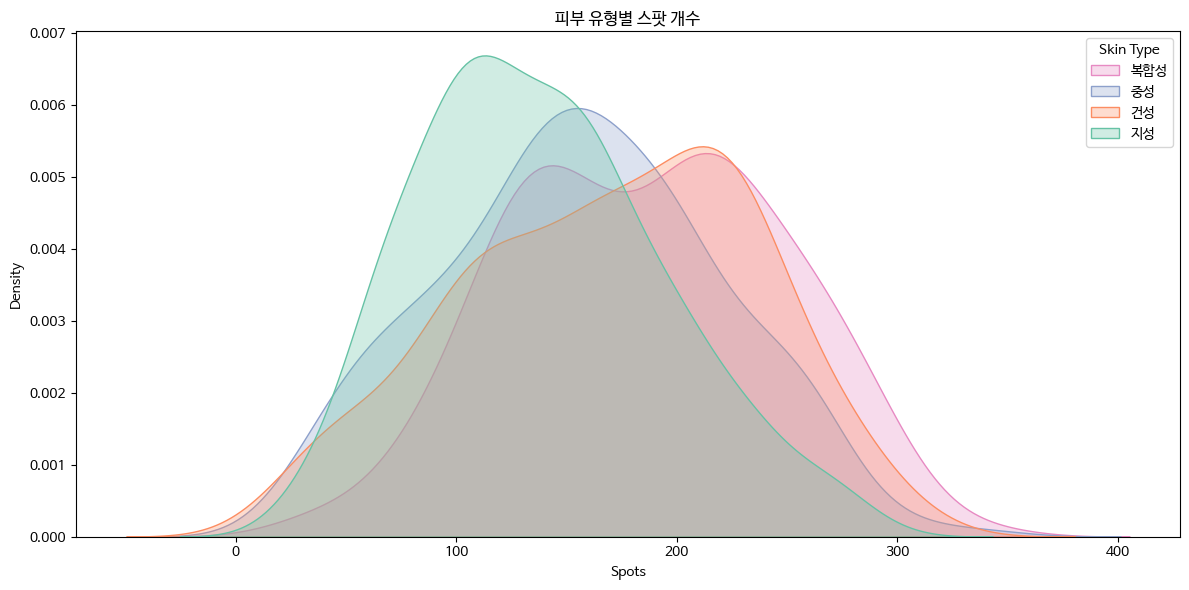

In [ ]:
# 피부 타입별 스팟 개수 분포 시각화
plt.figure(figsize=(12, 6))

# KDE 플롯 그리기
sns.kdeplot(data=df, x='스팟개수_정면', hue='얼굴피부타입', fill=True, common_norm=False, palette='Set2', alpha=0.3, legend=False)

# 제목 및 레이블 설정
plt.title('피부 유형별 스팟 개수')
plt.xlabel('Spots')
plt.ylabel('Density')

# 범례 수동 추가
plt.legend(title='Skin Type', labels=df['얼굴피부타입'].unique())
plt.tight_layout()

# 차트 보여주기
plt.show()


In [ ]:
# 적어도 하나의 얼굴 피부 타입 그룹에서 스팟 개수의 평균이 다른 그룹과 다르다.

import scipy.stats as stats

# ANOVA를 수행하기 위해 각 피부 타입별로 스팟 개수 추출
skin_types = df['얼굴피부타입'].unique()
spot_data = [df[df['얼굴피부타입'] == skin_type]['스팟개수_정면'] for skin_type in skin_types]

# 일원 분산분석(ANOVA) 수행
anova_result = stats.f_oneway(*spot_data)

# 결과 출력
print(f"F-statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")

# 유의수준 0.05에서 검정 결과 해석
if anova_result.pvalue < 0.05:
    print("p-value가 유의수준보다 작습니다. 따라서 얼굴 피부 타입에 따른 스팟 개수의 평균에 유의미한 차이가 있습니다.")
else:
    print("p-value가 유의수준보다 큽니다. 따라서 얼굴 피부 타입에 따른 스팟 개수의 평균에 유의미한 차이가 없습니다.")


F-statistic: 27.55145398765371
p-value: 3.650247931625812e-17
p-value가 유의수준보다 작습니다. 따라서 얼굴 피부 타입에 따른 스팟 개수의 평균에 유의미한 차이가 있습니다.


In [ ]:
from scipy import stats

# 각 피부 타입의 스팟 개수 데이터에 대해 정규성 검정 수행
normality_results = {}
for skin_type in skin_types:
    group_data = df[df['얼굴피부타입'] == skin_type]['스팟개수_정면']
    stat, p_value = stats.shapiro(group_data)
    normality_results[skin_type] = {'statistic': stat, 'p-value': p_value}

# 결과 출력
print("Normality Test Results:")
print(normality_results)


Normality Test Results:
{'복합성': {'statistic': 0.9820216842304272, 'p-value': 0.000513823487827722}, '중성': {'statistic': 0.9814738042264436, 'p-value': 0.0018325824384422824}, '건성': {'statistic': 0.9913280251725973, 'p-value': 0.06803298861386335}, '지성': {'statistic': 0.9883322137608044, 'p-value': 0.1277669542545365}}


In [ ]:
# 그룹 간의 등분산성 검정
levene_stat, levene_p = stats.levene(*[df[df['얼굴피부타입'] == skin_type]['스팟개수_정면'] for skin_type in skin_types])

print(f"Levene's Test Statistic: {levene_stat}, p-value: {levene_p}")


Levene's Test Statistic: 4.568105981317664, p-value: 0.003465112132343984


In [ ]:
import scipy.stats as stats
import itertools

# 피부 타입 목록
skin_types = ['복합성', '중성', '건성', '지성']

# 각 피부 타입에 대한 스팟 개수 데이터 추출
spot_data = {skin_type: df[df['얼굴피부타입'] == skin_type]['스팟개수_정면'] for skin_type in skin_types}

# 쌍별 T-검정 수행
results = {}
for (type1, type2) in itertools.combinations(skin_types, 2):
    t_stat, p_val = stats.ttest_ind(spot_data[type1], spot_data[type2], equal_var=False)  # 등분산성 가정하지 않음
    results[(type1, type2)] = (t_stat, p_val)

# 결과 출력
for (type1, type2), (t_stat, p_val) in results.items():
    print(f"{type1} vs {type2}:")
    print(f"  T-statistic: {t_stat}, p-value: {p_val}")
    if p_val < 0.05:
        print("  유의미한 차이가 있습니다.")
    else:
        print("  유의미한 차이가 없습니다.")


복합성 vs 중성:
  T-statistic: -6.095150803749119, p-value: 2.179093063046127e-09
  유의미한 차이가 있습니다.
복합성 vs 건성:
  T-statistic: -3.837384826930288, p-value: 0.00013741010667117884
  유의미한 차이가 있습니다.
복합성 vs 지성:
  T-statistic: -8.853884300559699, p-value: 4.11646504811023e-17
  유의미한 차이가 있습니다.
중성 vs 건성:
  T-statistic: 2.4058047346332367, p-value: 0.016472206835940337
  유의미한 차이가 있습니다.
중성 vs 지성:
  T-statistic: -2.805338367813144, p-value: 0.005262042732138687
  유의미한 차이가 있습니다.
건성 vs 지성:
  T-statistic: -5.241030025147318, p-value: 2.594022474624142e-07
  유의미한 차이가 있습니다.


In [ ]:
# 독립성 검증
from scipy.stats import chi2_contingency

# 피부 타입과 스팟 개수 간의 교차표 생성
contingency_table = pd.crosstab(df['얼굴피부타입'], df['스팟개수_정면'])

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")


Chi-square Statistic: 834.0438617468736
p-value: 0.08775496857413775
Degrees of Freedom: 780
Expected Frequencies:
[[0.2863806  0.57276119 0.57276119 ... 0.2863806  0.2863806  0.2863806 ]
 [0.29664179 0.59328358 0.59328358 ... 0.29664179 0.29664179 0.29664179]
 [0.24253731 0.48507463 0.48507463 ... 0.24253731 0.24253731 0.24253731]
 [0.1744403  0.3488806  0.3488806  ... 0.1744403  0.1744403  0.1744403 ]]


In [ ]:
df['스팟개수_정면'].value_counts().sort_index()

,count
스팟개수_정면,
16,1
19,2
27,2
28,1
29,2
...,...
310,1
315,1
316,1


#### (수분_이마, 수분_오른쪽볼, 수분_왼쪽볼)y - 사람 x

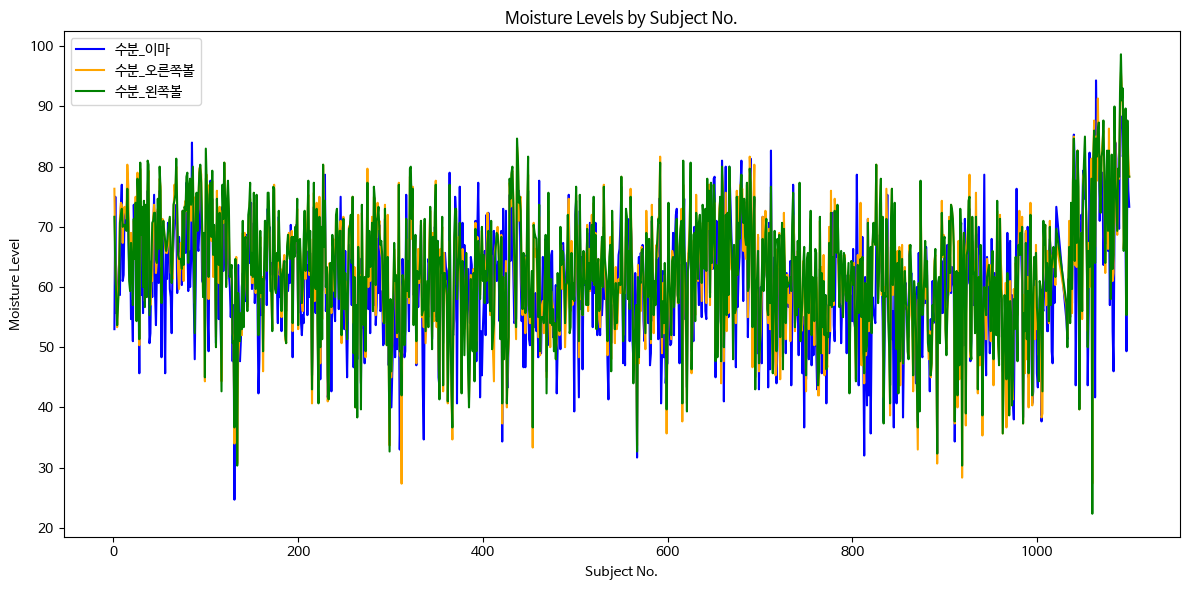

In [ ]:
import matplotlib.pyplot as plt

# 데이터프레임에서 필요한 컬럼 선택
x = df['subject_no']
y1 = df['수분_이마']
y2 = df['수분_오른쪽볼']
y3 = df['수분_왼쪽볼']

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(x, y1, label='수분_이마', color='blue')
plt.plot(x, y2, label='수분_오른쪽볼', color='orange')
plt.plot(x, y3, label='수분_왼쪽볼', color='green')

# 제목 및 레이블 설정
plt.title('Moisture Levels by Subject No.')
plt.xlabel('Subject No.')
plt.ylabel('Moisture Level')
plt.legend()
plt.tight_layout()

# 차트 보여주기
plt.show()


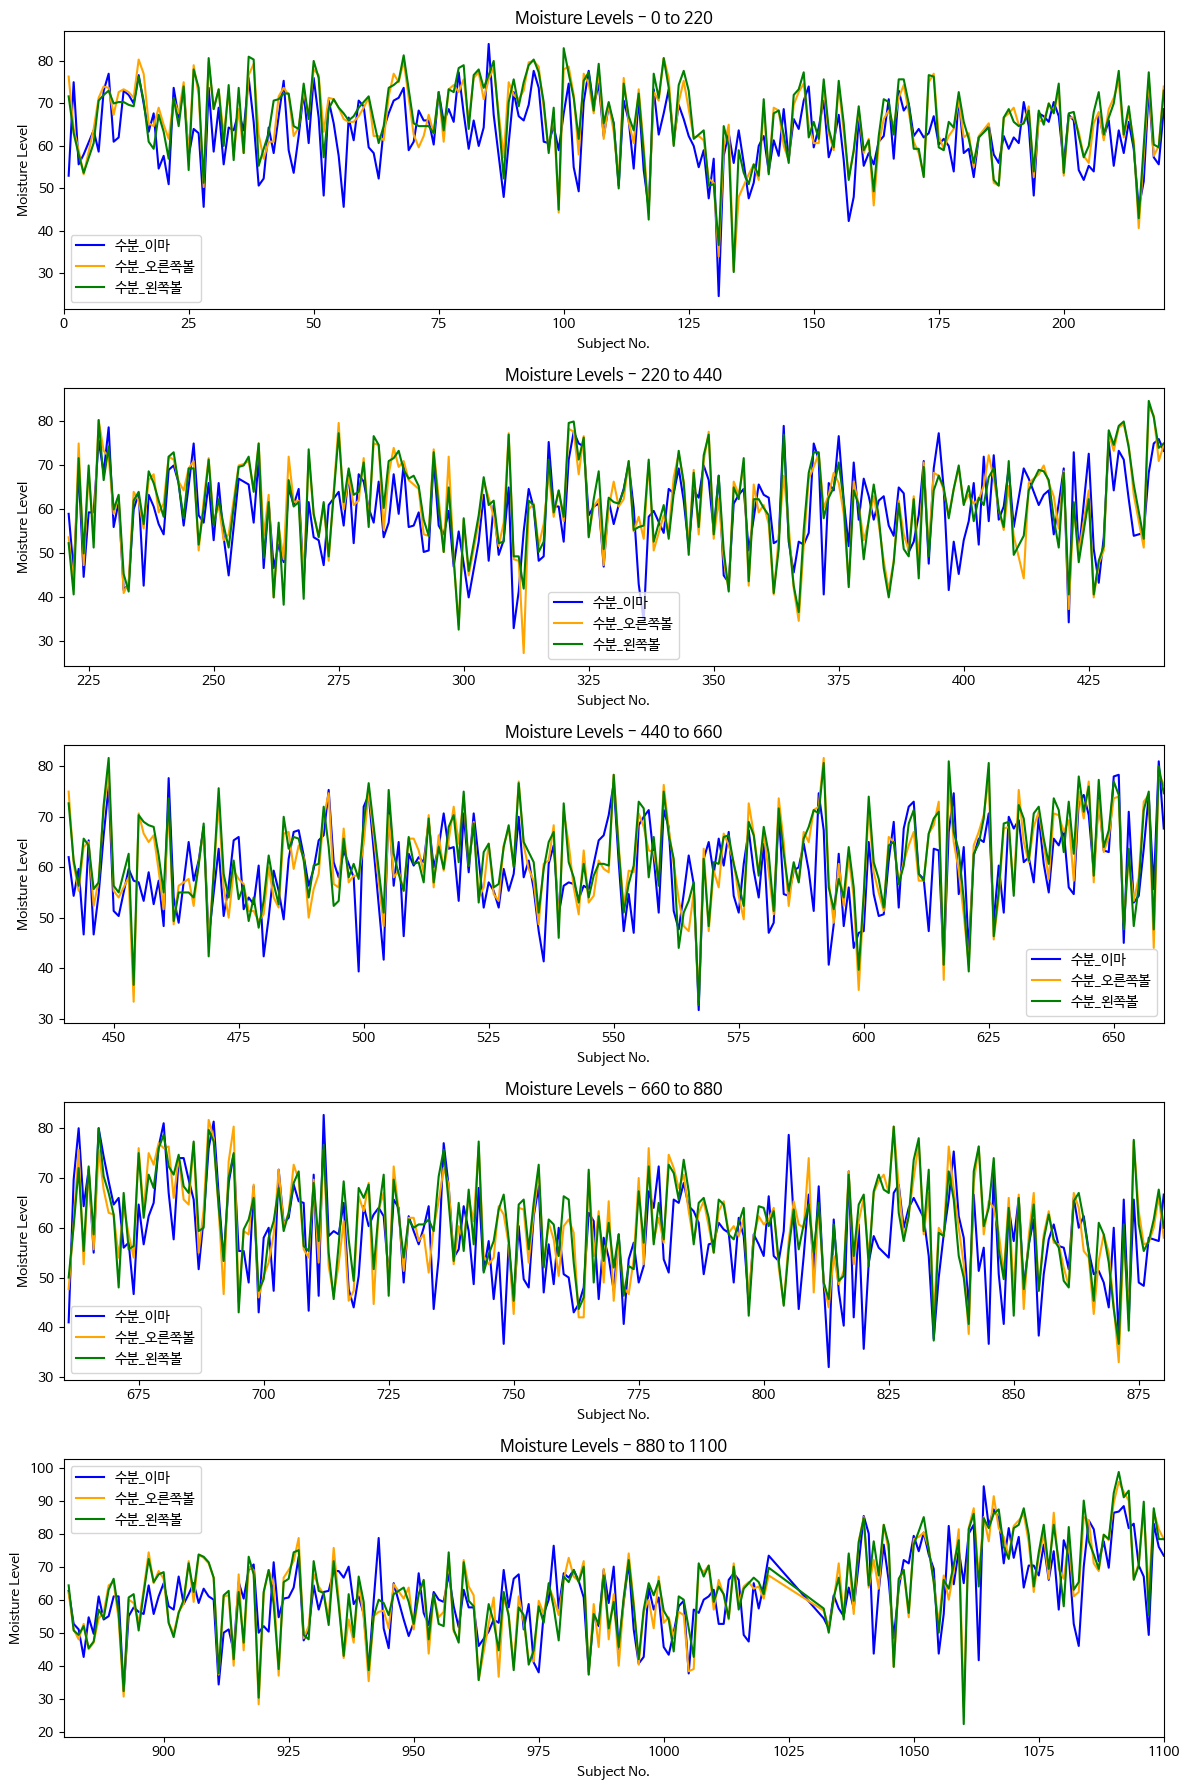

In [ ]:
import matplotlib.pyplot as plt

# 데이터프레임에서 필요한 컬럼 선택
x = df['subject_no']
y1 = df['수분_이마']
y2 = df['수분_오른쪽볼']
y3 = df['수분_왼쪽볼']

# 서브플롯 설정
plt.figure(figsize=(12, 18))

# 범위 0~220
plt.subplot(5, 1, 1)
plt.plot(x[(x >= 0) & (x <= 220)], y1[(x >= 0) & (x <= 220)], label='수분_이마', color='blue')
plt.plot(x[(x >= 0) & (x <= 220)], y2[(x >= 0) & (x <= 220)], label='수분_오른쪽볼', color='orange')
plt.plot(x[(x >= 0) & (x <= 220)], y3[(x >= 0) & (x <= 220)], label='수분_왼쪽볼', color='green')
plt.title('Moisture Levels - 0 to 220')
plt.xlabel('Subject No.')
plt.ylabel('Moisture Level')
plt.xlim(0, 220)
plt.legend()

# 범위 220~440
plt.subplot(5, 1, 2)
plt.plot(x[(x > 220) & (x <= 440)], y1[(x > 220) & (x <= 440)], label='수분_이마', color='blue')
plt.plot(x[(x > 220) & (x <= 440)], y2[(x > 220) & (x <= 440)], label='수분_오른쪽볼', color='orange')
plt.plot(x[(x > 220) & (x <= 440)], y3[(x > 220) & (x <= 440)], label='수분_왼쪽볼', color='green')
plt.title('Moisture Levels - 220 to 440')
plt.xlabel('Subject No.')
plt.ylabel('Moisture Level')
plt.xlim(220, 440)
plt.legend()

# 범위 440~660
plt.subplot(5, 1, 3)
plt.plot(x[(x > 440) & (x <= 660)], y1[(x > 440) & (x <= 660)], label='수분_이마', color='blue')
plt.plot(x[(x > 440) & (x <= 660)], y2[(x > 440) & (x <= 660)], label='수분_오른쪽볼', color='orange')
plt.plot(x[(x > 440) & (x <= 660)], y3[(x > 440) & (x <= 660)], label='수분_왼쪽볼', color='green')
plt.title('Moisture Levels - 440 to 660')
plt.xlabel('Subject No.')
plt.ylabel('Moisture Level')
plt.xlim(440, 660)
plt.legend()

# 범위 660~880
plt.subplot(5, 1, 4)
plt.plot(x[(x > 660) & (x <= 880)], y1[(x > 660) & (x <= 880)], label='수분_이마', color='blue')
plt.plot(x[(x > 660) & (x <= 880)], y2[(x > 660) & (x <= 880)], label='수분_오른쪽볼', color='orange')
plt.plot(x[(x > 660) & (x <= 880)], y3[(x > 660) & (x <= 880)], label='수분_왼쪽볼', color='green')
plt.title('Moisture Levels - 660 to 880')
plt.xlabel('Subject No.')
plt.ylabel('Moisture Level')
plt.xlim(660, 880)
plt.legend()

# 범위 880~1100
plt.subplot(5, 1, 5)
plt.plot(x[(x > 880) & (x <= 1100)], y1[(x > 880) & (x <= 1100)], label='수분_이마', color='blue')
plt.plot(x[(x > 880) & (x <= 1100)], y2[(x > 880) & (x <= 1100)], label='수분_오른쪽볼', color='orange')
plt.plot(x[(x > 880) & (x <= 1100)], y3[(x > 880) & (x <= 1100)], label='수분_왼쪽볼', color='green')
plt.title('Moisture Levels - 880 to 1100')
plt.xlabel('Subject No.')
plt.ylabel('Moisture Level')
plt.xlim(880, 1100)
plt.legend()

plt.tight_layout()

# 차트 보여주기
plt.show()


<ipython-input-65-fd72f79d4305>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 1, 6)


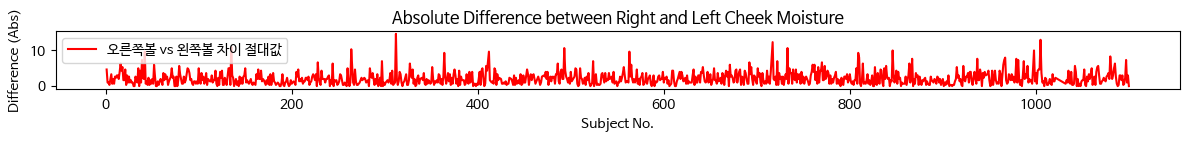

In [ ]:
import matplotlib.pyplot as plt

# 데이터프레임에서 필요한 컬럼 선택
x = df['subject_no']
y1 = df['수분_이마']
y2 = df['수분_오른쪽볼']
y3 = df['수분_왼쪽볼']

# 오른쪽볼과 왼쪽볼의 차이의 절대값 계산
diff_abs = abs(y2 - y3)

# 막대그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(x, diff_abs, color='red', label='오른쪽볼 vs 왼쪽볼 차이 절대값')

# 오른쪽볼과 왼쪽볼 차이의 절대값 시각화
plt.subplot(6, 1, 6)
plt.plot(x, diff_abs, label='오른쪽볼 vs 왼쪽볼 차이 절대값', color='red')
plt.title('Absolute Difference between Right and Left Cheek Moisture')
plt.xlabel('Subject No.')
plt.ylabel('Difference (Abs)')
plt.legend()

plt.tight_layout()

# 차트 보여주기
plt.show()


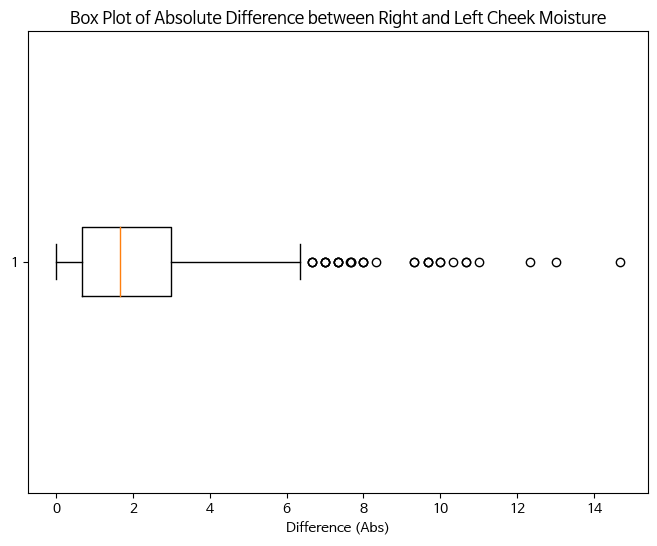

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(diff_abs, vert=False)
plt.title('Box Plot of Absolute Difference between Right and Left Cheek Moisture')
plt.xlabel('Difference (Abs)')
plt.show()


In [ ]:
# 이상치 기준 설정
threshold = 7

# 이상치 인덱스 추출
outlier_indices = diff_abs[diff_abs >= threshold].index.tolist()
# 이상치 인덱스 개수 계산
num_outliers = len(outlier_indices)

# 결과 출력
print("이상치 인덱스:", outlier_indices)
print("이상치 인덱스 개수:", num_outliers)

이상치 인덱스: [37, 40, 132, 259, 291, 305, 356, 403, 478, 507, 546, 699, 700, 705, 716, 792, 793, 829, 850, 920, 947, 948, 960, 962, 968, 979, 986, 1051, 1068]
이상치 인덱스 개수: 29


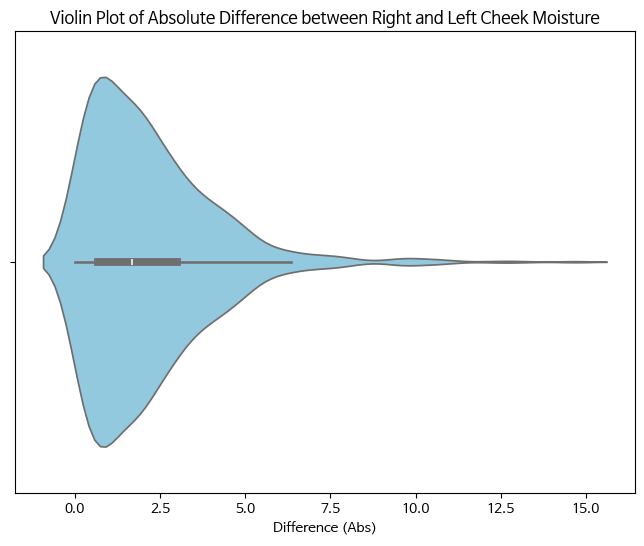

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 바이올린 플롯 시각화
plt.figure(figsize=(8, 6))
sns.violinplot(x=diff_abs, color='skyblue')  # x 축에 차이값을 넣고 색상 설정
plt.title('Violin Plot of Absolute Difference between Right and Left Cheek Moisture')
plt.xlabel('Difference (Abs)')
plt.show()


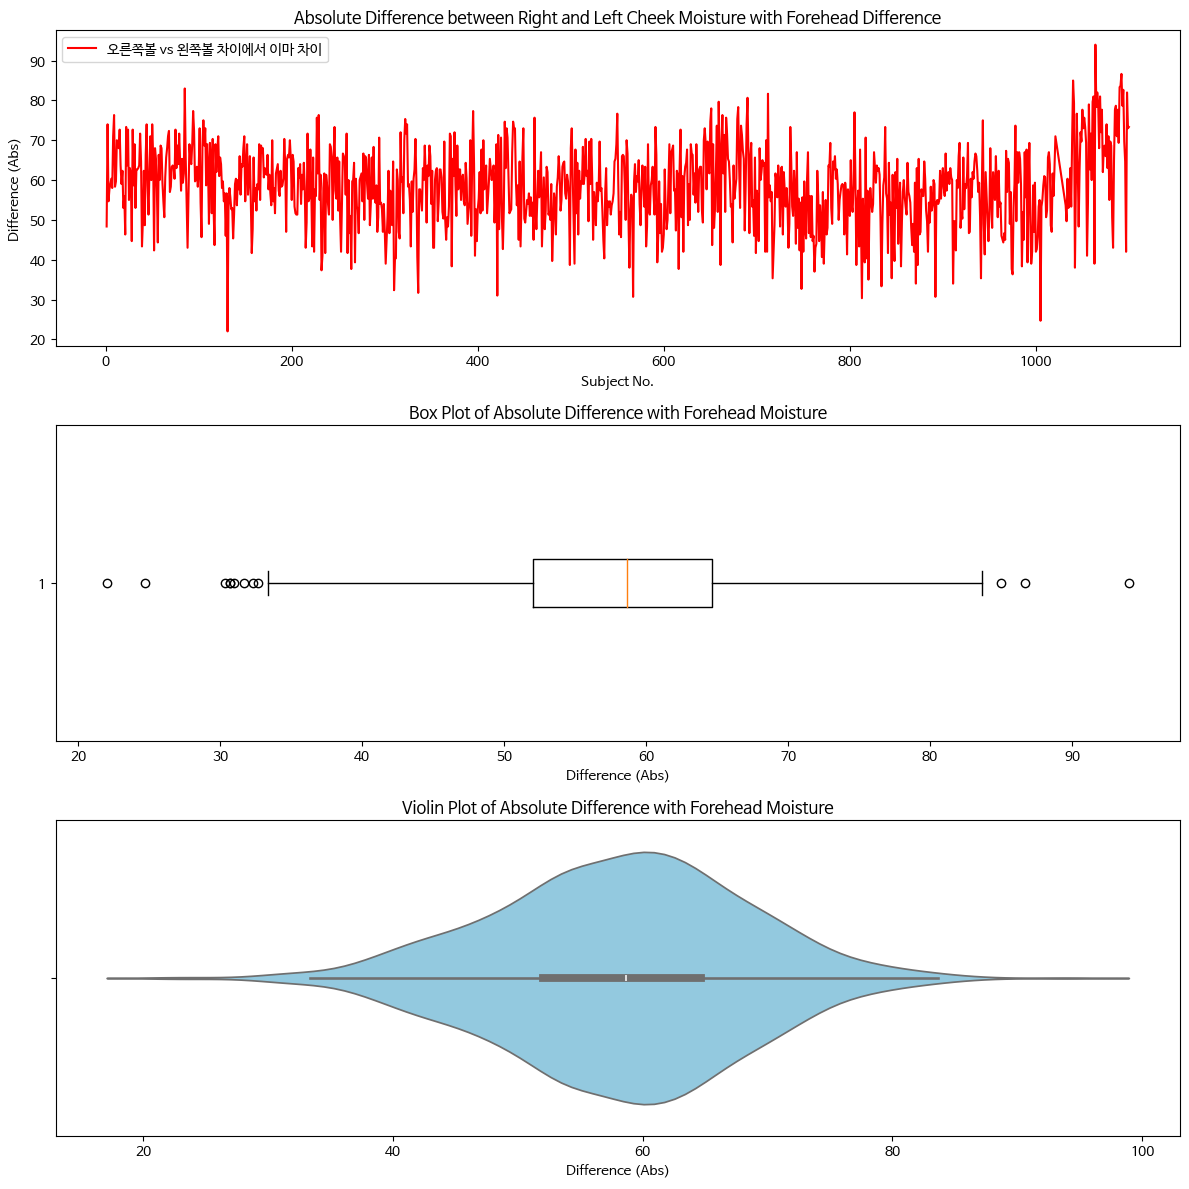

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임에서 필요한 컬럼 선택
x = df['subject_no']
y1 = df['수분_이마']
y2 = df['수분_오른쪽볼']
y3 = df['수분_왼쪽볼']

# 오른쪽볼과 왼쪽볼의 차이의 절대값 계산
diff_cheek = abs(y2 - y3)

# 이마와 양쪽 볼 차이의 절대값 계산
diff_with_forehead = abs(diff_cheek - y1)

# 그래프 그리기
plt.figure(figsize=(12, 12))

# 1. 오른쪽볼과 왼쪽볼 차이의 절대값 선그래프
plt.subplot(3, 1, 1)
plt.plot(x, diff_with_forehead, label='오른쪽볼 vs 왼쪽볼 차이에서 이마 차이', color='red')
plt.title('Absolute Difference between Right and Left Cheek Moisture with Forehead Difference')
plt.xlabel('Subject No.')
plt.ylabel('Difference (Abs)')
plt.legend()

# 2. 박스플롯
plt.subplot(3, 1, 2)
plt.boxplot(diff_with_forehead, vert=False)
plt.title('Box Plot of Absolute Difference with Forehead Moisture')
plt.xlabel('Difference (Abs)')

# 3. 바이올린 플롯
plt.subplot(3, 1, 3)
sns.violinplot(x=diff_with_forehead, color='skyblue')
plt.title('Violin Plot of Absolute Difference with Forehead Moisture')
plt.xlabel('Difference (Abs)')

plt.tight_layout()

# 차트 보여주기
plt.show()


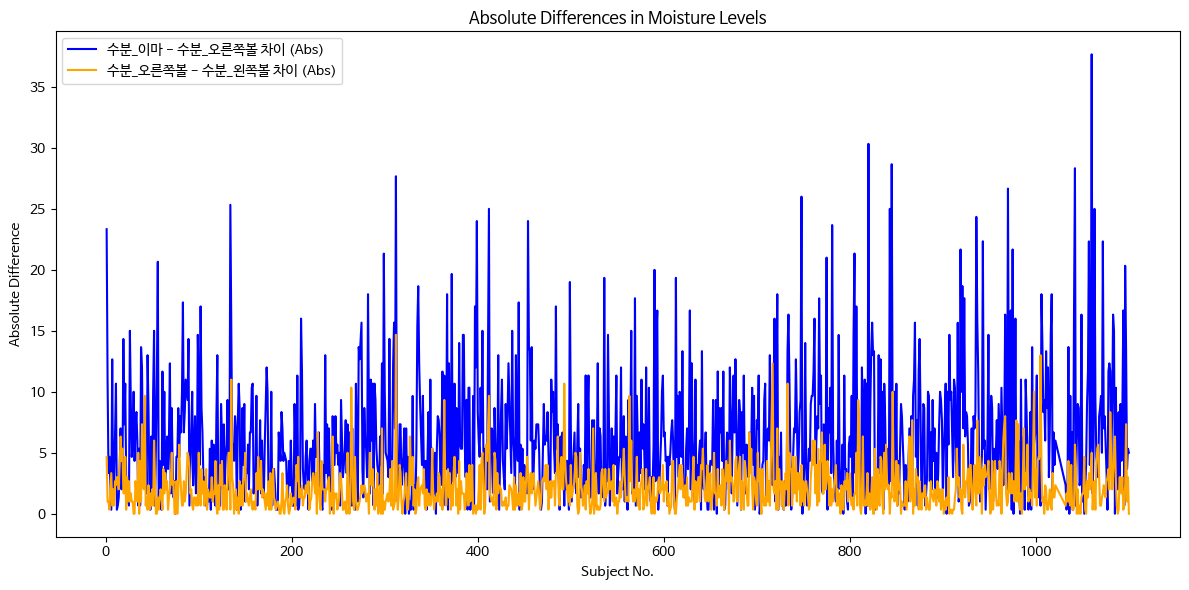

In [ ]:
import matplotlib.pyplot as plt

# 차이의 절대값 계산
diff_immediate = abs(df['수분_이마'] - df['수분_오른쪽볼'])
diff_cheek = abs(df['수분_오른쪽볼'] - df['수분_왼쪽볼'])

# 선 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['subject_no'], diff_immediate, label='수분_이마 - 수분_오른쪽볼 차이 (Abs)', color='blue')
plt.plot(df['subject_no'], diff_cheek, label='수분_오른쪽볼 - 수분_왼쪽볼 차이 (Abs)', color='orange')

# 그래프 설정
plt.title('Absolute Differences in Moisture Levels')
plt.xlabel('Subject No.')
plt.ylabel('Absolute Difference')
plt.legend()
plt.tight_layout()

# 차트 보여주기
plt.show()
